In [279]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz


In [280]:
raw_data = pd.read_csv('/Users/truptikhodke/Downloads/StartupFile_USA_Final.csv')

In [281]:
raw_data.head()

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,homepage_url_code,time_delayFor_first_round,average_time_delay_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,No_Of_Investors,MainCategory,USA_Region,statusCode
0,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,3,7/20/11,2/5/14,1,566 days 00:00:00.000000000,465 days 12:00:00.000000000,575025.0,465,566,12,mobile,West,1
1,10-20 Media,http://www.10-20media.com,e-commerce,2050000.0,operating,USA,MD,4,6/18/09,12/28/11,1,285 days 00:00:00.000000000,307 days 16:00:00.000000000,512500.0,307,285,1,e-commerce,South,0
2,Redox,http://www.redoxengine.com,health care|health care information technology...,4000000.0,operating,USA,WI,2,11/26/14,10/20/15,1,328 days 00:00:00.000000000,328 days 00:00:00.000000000,2000000.0,328,328,6,healthcare,Midwest,1
3,10sec,https://10s.ec/,e-commerce|mobile commerce|social commerce,1600000.0,operating,USA,CA,2,10/31/13,5/8/14,1,189 days 00:00:00.000000000,189 days 00:00:00.000000000,1600000.0,189,189,2,mobile,West,1
4,10X Technologies,http://10xtechnologies.com,biotechnology,3550000.0,operating,USA,CA,2,11/7/12,1/12/15,1,796 days 00:00:00.000000000,796 days 00:00:00.000000000,1775000.0,796,796,1,biotech,West,1


In [282]:
print(f"The dataset contains {len(raw_data)} observations")

The dataset contains 9623 observations


In [283]:
raw_data.shape

(9623, 20)

In [284]:
raw_data.isna().sum()

startupName                           0
homepage_url                        235
category_list                         0
total_funding                         0
status                                0
country_code                          0
state_code                            0
funding_rounds                        0
first_funding_at                      0
last_funding_at                       0
homepage_url_code                     0
time_delayFor_first_round             0
average_time_delay_rounds             0
average_raised_usd                    0
average_time_delay_rounds_number      0
time_delayFor_first_round_number      0
No_Of_Investors                       0
MainCategory                          0
USA_Region                            0
statusCode                            0
dtype: int64

In [285]:
raw_data[raw_data.homepage_url.isna()]

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,homepage_url_code,time_delayFor_first_round,average_time_delay_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,No_Of_Investors,MainCategory,USA_Region,statusCode
64,7mb Technologies,NaN,software,1017470.0,operating,USA,WA,3,10/28/13,8/14/15,0,266 days 00:00:00.000000000,327 days 12:00:00.000000000,3.391567e+05,327,266,1,software,West,1
101,Accelerated Pharma,NaN,pharmaceuticals,2549999.0,operating,USA,IL,2,6/4/15,11/23/15,0,172 days 00:00:00.000000000,172 days 00:00:00.000000000,1.275000e+06,172,172,1,pharma,Midwest,1
110,Accept Software,NaN,career management|software,25305000.0,acquired,USA,CA,4,9/16/05,12/14/10,0,314 days 00:00:00.000000000,638 days 08:00:00.000000000,6.326250e+06,638,314,3,software,West,1
227,ADVANCE Medical,NaN,health care,26000000.0,operating,USA,CA,2,5/31/11,9/4/13,0,827 days 00:00:00.000000000,827 days 00:00:00.000000000,1.300000e+07,827,827,3,healthcare,West,1
245,Advanced System Designs,NaN,software,1325000.0,operating,USA,IL,2,6/9/09,8/17/10,0,434 days 00:00:00.000000000,434 days 00:00:00.000000000,6.625000e+05,434,434,1,software,Midwest,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9221,Waterford Battery Systems,NaN,batteries|electrical distribution|manufacturing,1594130.0,operating,USA,FL,2,3/17/14,7/15/15,0,485 days 00:00:00.000000000,485 days 00:00:00.000000000,7.970650e+05,485,485,1,manufacturing,South,1
9304,Whi,NaN,health and wellness|health care|medical,11317850.0,operating,USA,CA,2,4/2/14,4/13/15,0,376 days 00:00:00.000000000,376 days 00:00:00.000000000,5.658925e+06,376,376,1,pharma,West,1
9335,Windtronics,NaN,hardware + software,4000000.0,operating,USA,MI,2,4/1/09,1/12/10,0,286 days 00:00:00.000000000,286 days 00:00:00.000000000,2.000000e+06,286,286,1,software,Midwest,0
9421,XenSource,NaN,software,38000000.0,operating,USA,CA,3,1/13/05,10/31/06,0,231 days 00:00:00.000000000,328 days 00:00:00.000000000,1.266667e+07,328,231,6,software,West,1


In [286]:
#homepage_url_new mark 0 if no url else mark 1
raw_data['homepage_url_new'] = np.where(raw_data.homepage_url.isna(), 0, 1)

In [287]:
raw_data.head()

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,...,time_delayFor_first_round,average_time_delay_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,No_Of_Investors,MainCategory,USA_Region,statusCode,homepage_url_new
0,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,3,7/20/11,2/5/14,...,566 days 00:00:00.000000000,465 days 12:00:00.000000000,575025.0,465,566,12,mobile,West,1,1
1,10-20 Media,http://www.10-20media.com,e-commerce,2050000.0,operating,USA,MD,4,6/18/09,12/28/11,...,285 days 00:00:00.000000000,307 days 16:00:00.000000000,512500.0,307,285,1,e-commerce,South,0,1
2,Redox,http://www.redoxengine.com,health care|health care information technology...,4000000.0,operating,USA,WI,2,11/26/14,10/20/15,...,328 days 00:00:00.000000000,328 days 00:00:00.000000000,2000000.0,328,328,6,healthcare,Midwest,1,1
3,10sec,https://10s.ec/,e-commerce|mobile commerce|social commerce,1600000.0,operating,USA,CA,2,10/31/13,5/8/14,...,189 days 00:00:00.000000000,189 days 00:00:00.000000000,1600000.0,189,189,2,mobile,West,1,1
4,10X Technologies,http://10xtechnologies.com,biotechnology,3550000.0,operating,USA,CA,2,11/7/12,1/12/15,...,796 days 00:00:00.000000000,796 days 00:00:00.000000000,1775000.0,796,796,1,biotech,West,1,1


In [288]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9623 entries, 0 to 9622
Data columns (total 21 columns):
startupName                         9623 non-null object
homepage_url                        9388 non-null object
category_list                       9623 non-null object
total_funding                       9623 non-null float64
status                              9623 non-null object
country_code                        9623 non-null object
state_code                          9623 non-null object
funding_rounds                      9623 non-null int64
first_funding_at                    9623 non-null object
last_funding_at                     9623 non-null object
homepage_url_code                   9623 non-null int64
time_delayFor_first_round           9623 non-null object
average_time_delay_rounds           9623 non-null object
average_raised_usd                  9623 non-null float64
average_time_delay_rounds_number    9623 non-null int64
time_delayFor_first_round_number    962

In [289]:
#converting to datetime
raw_data.first_funding_at = pd.to_datetime(raw_data.first_funding_at)
raw_data.last_funding_at  = pd.to_datetime(raw_data.last_funding_at )


#calculating the number of days
raw_data['TimeBetweenFirstLast']=(raw_data.last_funding_at - raw_data.first_funding_at).astype('timedelta64[D]')



In [290]:
raw_data.head()

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,...,average_time_delay_rounds,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,No_Of_Investors,MainCategory,USA_Region,statusCode,homepage_url_new,TimeBetweenFirstLast
0,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,3,2011-07-20,2014-02-05,...,465 days 12:00:00.000000000,575025.0,465,566,12,mobile,West,1,1,931.0
1,10-20 Media,http://www.10-20media.com,e-commerce,2050000.0,operating,USA,MD,4,2009-06-18,2011-12-28,...,307 days 16:00:00.000000000,512500.0,307,285,1,e-commerce,South,0,1,923.0
2,Redox,http://www.redoxengine.com,health care|health care information technology...,4000000.0,operating,USA,WI,2,2014-11-26,2015-10-20,...,328 days 00:00:00.000000000,2000000.0,328,328,6,healthcare,Midwest,1,1,328.0
3,10sec,https://10s.ec/,e-commerce|mobile commerce|social commerce,1600000.0,operating,USA,CA,2,2013-10-31,2014-05-08,...,189 days 00:00:00.000000000,1600000.0,189,189,2,mobile,West,1,1,189.0
4,10X Technologies,http://10xtechnologies.com,biotechnology,3550000.0,operating,USA,CA,2,2012-11-07,2015-01-12,...,796 days 00:00:00.000000000,1775000.0,796,796,1,biotech,West,1,1,796.0


In [291]:
#Label encoding main category list
raw_data = raw_data.astype({"MainCategory":'category'})
raw_data["category_code"] = raw_data["MainCategory"].cat.codes
raw_data.head(20)

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,...,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,No_Of_Investors,MainCategory,USA_Region,statusCode,homepage_url_new,TimeBetweenFirstLast,category_code
0,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,3,2011-07-20,2014-02-05,...,5.750250e+05,465,566,12,mobile,West,1,1,931.0,6
1,10-20 Media,http://www.10-20media.com,e-commerce,2050000.0,operating,USA,MD,4,2009-06-18,2011-12-28,...,5.125000e+05,307,285,1,e-commerce,South,0,1,923.0,1
2,Redox,http://www.redoxengine.com,health care|health care information technology...,4000000.0,operating,USA,WI,2,2014-11-26,2015-10-20,...,2.000000e+06,328,328,6,healthcare,Midwest,1,1,328.0,3
3,10sec,https://10s.ec/,e-commerce|mobile commerce|social commerce,1600000.0,operating,USA,CA,2,2013-10-31,2014-05-08,...,1.600000e+06,189,189,2,mobile,West,1,1,189.0,6
4,10X Technologies,http://10xtechnologies.com,biotechnology,3550000.0,operating,USA,CA,2,2012-11-07,2015-01-12,...,1.775000e+06,796,796,1,biotech,West,1,1,796.0,0
5,121nexus,http://www.121nexus.com,health diagnostics|medical devices|personaliza...,794000.0,operating,USA,RI,6,2012-02-06,2014-01-01,...,1.323333e+05,139,74,6,medicalGear,Northeast,1,1,695.0,5
6,1366 Technologies,http://www.1366tech.com,manufacturing,71450000.0,operating,USA,MA,9,2008-03-27,2015-04-09,...,7.938889e+06,321,678,9,manufacturing,Northeast,1,1,2569.0,4
7,15Five,http://15five.com,software,3400000.0,operating,USA,CA,3,2012-01-01,2014-10-02,...,1.133333e+06,502,380,14,software,West,1,1,1005.0,8
8,1DocWay,http://1docway.com,doctors|health care|health care information te...,1700000.0,acquired,USA,NY,2,2011-08-10,2015-07-21,...,1.700000e+06,1441,1441,12,healthcare,Northeast,1,1,1441.0,3
9,Babyscripts,http://www.getbabyscripts.com,health and wellness|mobile health,2100000.0,operating,USA,DC,3,2013-03-11,2015-04-10,...,7.000000e+05,380,287,4,healthcare,South,1,1,760.0,3


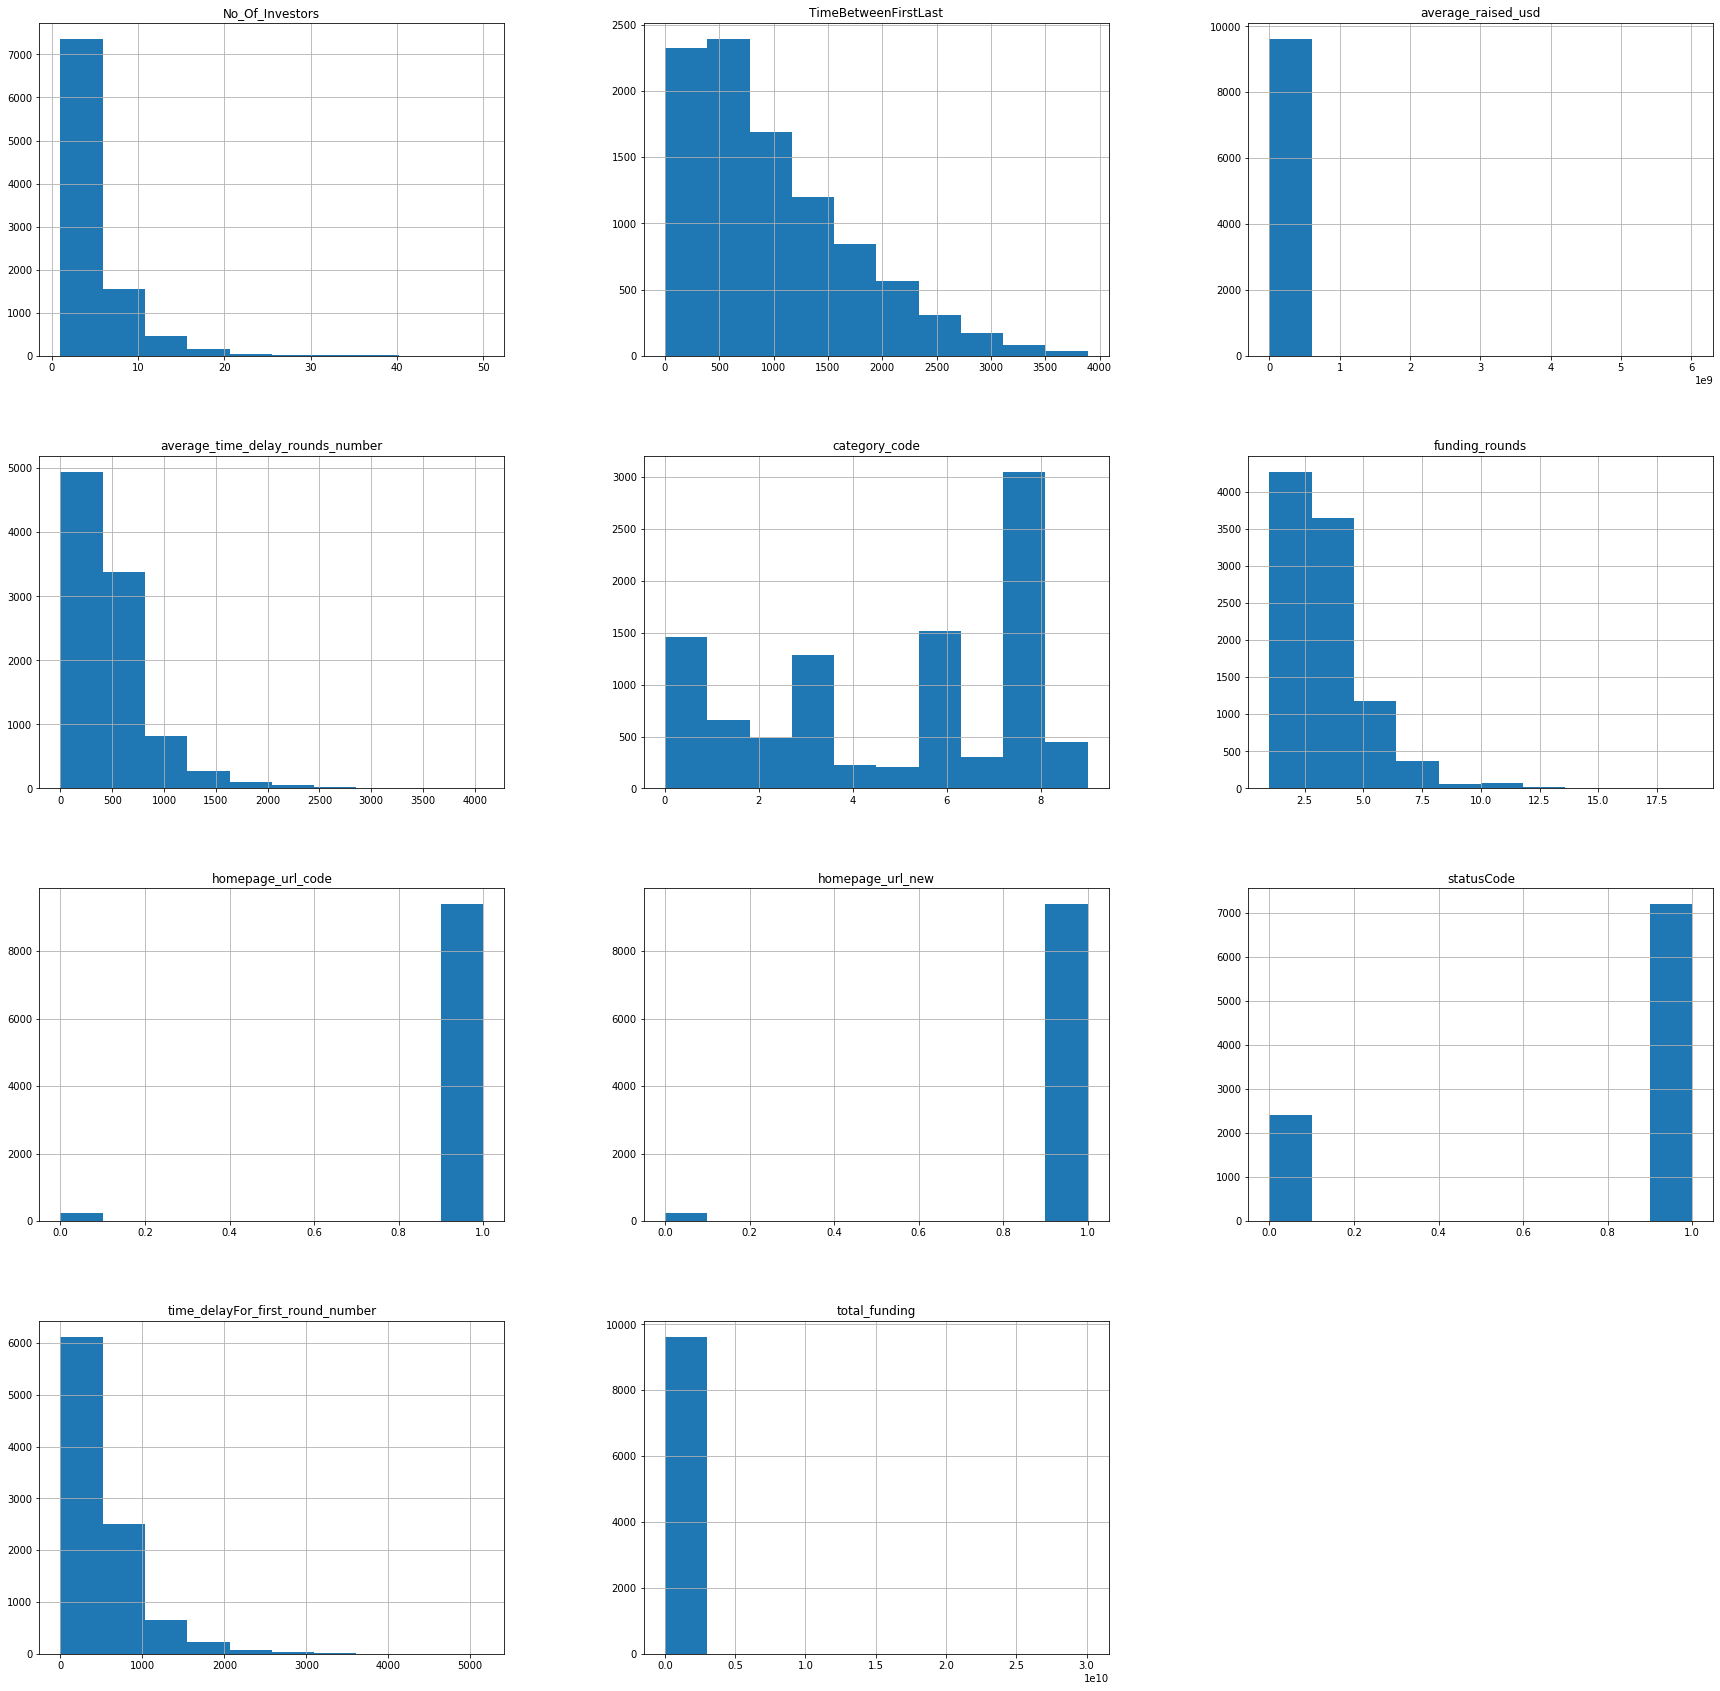

In [292]:
# Plotting the distribution of numerical and boolean categories
raw_data.hist(figsize=(30,30));

In [293]:
raw_data.head()

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,...,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,No_Of_Investors,MainCategory,USA_Region,statusCode,homepage_url_new,TimeBetweenFirstLast,category_code
0,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,3,2011-07-20,2014-02-05,...,575025.0,465,566,12,mobile,West,1,1,931.0,6
1,10-20 Media,http://www.10-20media.com,e-commerce,2050000.0,operating,USA,MD,4,2009-06-18,2011-12-28,...,512500.0,307,285,1,e-commerce,South,0,1,923.0,1
2,Redox,http://www.redoxengine.com,health care|health care information technology...,4000000.0,operating,USA,WI,2,2014-11-26,2015-10-20,...,2000000.0,328,328,6,healthcare,Midwest,1,1,328.0,3
3,10sec,https://10s.ec/,e-commerce|mobile commerce|social commerce,1600000.0,operating,USA,CA,2,2013-10-31,2014-05-08,...,1600000.0,189,189,2,mobile,West,1,1,189.0,6
4,10X Technologies,http://10xtechnologies.com,biotechnology,3550000.0,operating,USA,CA,2,2012-11-07,2015-01-12,...,1775000.0,796,796,1,biotech,West,1,1,796.0,0


In [294]:
#Label encoding USA region 
raw_data = raw_data.astype({"USA_Region":'category'})
raw_data["USARegion_code"] = raw_data["USA_Region"].cat.codes
raw_data.head()

,startupName,homepage_url,category_list,total_funding,status,country_code,state_code,funding_rounds,first_funding_at,last_funding_at,...,average_time_delay_rounds_number,time_delayFor_first_round_number,No_Of_Investors,MainCategory,USA_Region,statusCode,homepage_url_new,TimeBetweenFirstLast,category_code,USARegion_code
0,One Inc.,http://whatis1.com,mobile,1150050.0,operating,USA,CA,3,2011-07-20,2014-02-05,...,465,566,12,mobile,West,1,1,931.0,6,3
1,10-20 Media,http://www.10-20media.com,e-commerce,2050000.0,operating,USA,MD,4,2009-06-18,2011-12-28,...,307,285,1,e-commerce,South,0,1,923.0,1,2
2,Redox,http://www.redoxengine.com,health care|health care information technology...,4000000.0,operating,USA,WI,2,2014-11-26,2015-10-20,...,328,328,6,healthcare,Midwest,1,1,328.0,3,0
3,10sec,https://10s.ec/,e-commerce|mobile commerce|social commerce,1600000.0,operating,USA,CA,2,2013-10-31,2014-05-08,...,189,189,2,mobile,West,1,1,189.0,6,3
4,10X Technologies,http://10xtechnologies.com,biotechnology,3550000.0,operating,USA,CA,2,2012-11-07,2015-01-12,...,796,796,1,biotech,West,1,1,796.0,0,3


In [319]:
cleandf = raw_data.drop(columns = ['startupName','homepage_url','category_list','status','country_code','time_delayFor_first_round',
                    'state_code','first_funding_at','last_funding_at','homepage_url_new','MainCategory','USA_Region',
                        'average_time_delay_rounds'])

In [320]:
cleandf.head()

,total_funding,funding_rounds,homepage_url_code,average_raised_usd,average_time_delay_rounds_number,time_delayFor_first_round_number,No_Of_Investors,statusCode,TimeBetweenFirstLast,category_code,USARegion_code
0,1150050.0,3,1,575025.0,465,566,12,1,931.0,6,3
1,2050000.0,4,1,512500.0,307,285,1,0,923.0,1,2
2,4000000.0,2,1,2000000.0,328,328,6,1,328.0,3,0
3,1600000.0,2,1,1600000.0,189,189,2,1,189.0,6,3
4,3550000.0,2,1,1775000.0,796,796,1,1,796.0,0,3


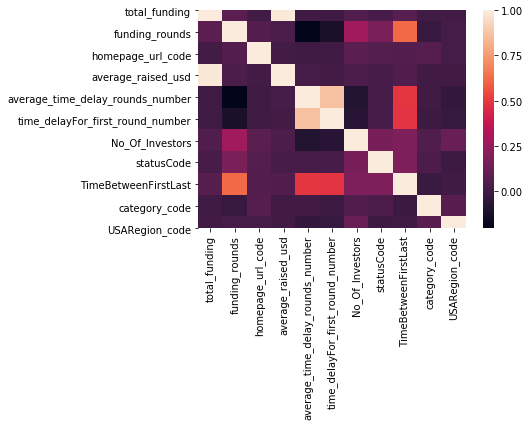

In [297]:
# Calculating the correlation matrix
corr = cleandf.corr()
# Generating a heatmap
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns)

#As it can be seen from the plot that the predictor variables do not show high multicolinearity

In [298]:
#split dataset in features and target variable

y = cleandf.statusCode # Target variable
x = cleandf[[ 'total_funding', 'funding_rounds','homepage_url_code','average_raised_usd','average_time_delay_rounds_number',
            'time_delayFor_first_round_number','No_Of_Investors','category_code','TimeBetweenFirstLast','USARegion_code']]

In [299]:
#splitting the dataset into train and test

x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [300]:
#Scaling the independent variables

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [301]:
#Building the decision tree
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

#make predictions on the test data
y_pred = classifier.predict(x_test)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm



array([[ 209,  484],
       [ 468, 1726]])

838 observations were classified as false

In [302]:
# Accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6702459300311743


Optimizing the decision tree classifier

In [340]:

classifier = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
model = classifier.fit(x_train, y_train)

#make predictions on the test data
y_pred = classifier.predict(x_test)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[  33,  660],
       [  37, 2157]])

In [341]:
# Accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7585729130585382


Feature: 0, Score: 0.05995
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.45133
Feature: 7, Score: 0.09884
Feature: 8, Score: 0.38988
Feature: 9, Score: 0.00000


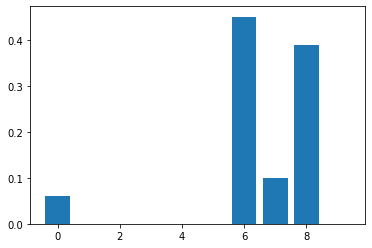

In [329]:
from matplotlib import pyplot
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [337]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm



array([[   8,  685],
       [   7, 2187]])

In [338]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7603048146865258


No handles with labels found to put in legend.


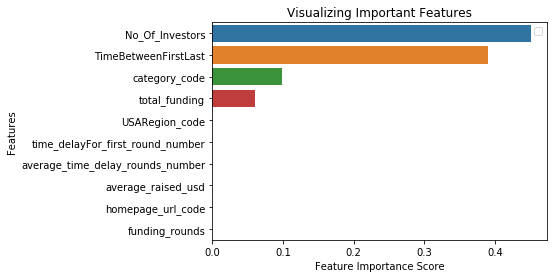

In [350]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_imp = feature_imp.nlargest(11)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()